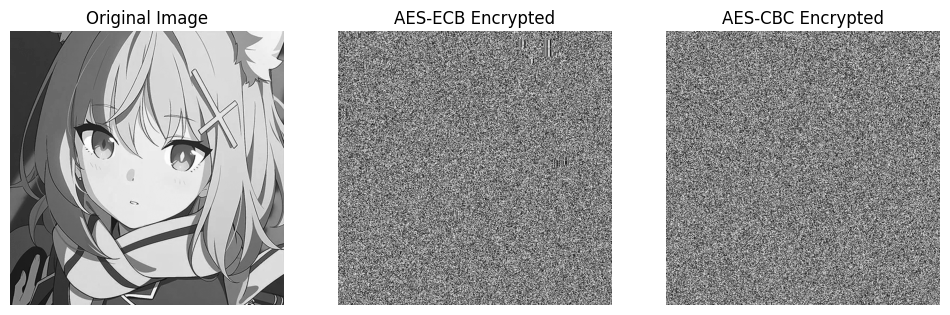

In [ ]:
import numpy as np
from PIL import Image
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
import matplotlib.pyplot as plt
import os

def load_grayscale_image(image_path):
	image = Image.open(image_path).convert('L')  # Convert to grayscale
	return np.array(image, dtype=np.uint8), image.size

def save_image(image_array, filename):
	Image.fromarray(image_array).save(filename)

def encrypt_image(image_array, key, mode):
	cipher = AES.new(key, mode)
	flat_image = image_array.flatten()
	padded_image = pad(flat_image.tobytes(), AES.block_size)  # Ensure byte format
	encrypted_image = cipher.encrypt(padded_image)
	encrypted_array = np.frombuffer(encrypted_image, dtype=np.uint8)
	return encrypted_array[:image_array.size].reshape(image_array.shape)

def encrypt_image_cbc(image_array, key, iv):
	cipher = AES.new(key, AES.MODE_CBC, iv)
	flat_image = image_array.flatten()
	padded_image = pad(flat_image.tobytes(), AES.block_size)  # Ensure byte format
	encrypted_image = cipher.encrypt(padded_image)
	encrypted_array = np.frombuffer(encrypted_image, dtype=np.uint8)
	return encrypted_array[:image_array.size].reshape(image_array.shape)

# Load grayscale image
image_path = '1.bmp'  # Change this to your BMP or PPM image
image_array, img_size = load_grayscale_image(image_path)

# AES Key (16 bytes for AES-128)
key = os.urandom(16)
iv = os.urandom(16)  # IV for CBC mode

# Encrypt with ECB
encrypted_ecb = encrypt_image(image_array, key, AES.MODE_ECB)

# Encrypt with CBC
encrypted_cbc = encrypt_image_cbc(image_array, key, iv)

# Display original and encrypted images
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(image_array, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(encrypted_ecb, cmap='gray')
axs[1].set_title('AES-ECB Encrypted')
axs[2].imshow(encrypted_cbc, cmap='gray')
axs[2].set_title('AES-CBC Encrypted')

for ax in axs:
	ax.axis('off')
plt.show()